In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch.nn as nn
from torch.nn import Sequential
from torch.autograd import Variable

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import svm

from IPython.display import Markdown, display

## Load Data

In [3]:
df = pd.read_csv(
    "data/plos_fulldata.csv",
    # names=header,
    index_col=0)

/tmp/ipykernel_7150/4005757943.py:1: DtypeWarning: Columns (67,75,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [4]:
display(df)

,filename,doi_x,AccessionID,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,...,cited_by_qna_count,cited_by_peer_review_sites_count,cited_by_weibo_count,cited_by_pinners_count,cited_by_linkedin_count,urn,cited_by_book_reviews_count,editors,attribution,ordinal_number
0,journal.pone.0080347.xml,10.1371/journal.pone.0080347,journal.pone.0080347,29.270,38.69,7.5,36,6.72,21,242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,journal.pone.0054670.xml,10.1371/journal.pone.0054670,journal.pone.0054670,17.565,29.11,7.3,33,4.67,13,154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,journal.pone.0195986.xml,10.1371/journal.pone.0195986,journal.pone.0195986,25.780,26.14,7.7,48,4.98,10,239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,journal.pone.0150364.xml,10.1371/journal.pone.0150364,journal.pone.0150364,25.815,28.30,7.8,43,4.81,10,207,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,journal.pone.0184653.xml,10.1371/journal.pone.0184653,journal.pone.0184653,27.640,34.60,7.2,47,5.40,16,254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189843,journal.pone.0212848.xml,10.1371/journal.pone.0212848,journal.pone.0212848,16.840,29.56,7.6,36,3.64,10,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189844,journal.pone.0157412.xml,10.1371/journal.pone.0157412,journal.pone.0157412,16.545,22.58,6.9,24,6.38,17,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189845,journal.pone.0109208.xml,10.1371/journal.pone.0109208,journal.pone.0109208,24.015,27.25,7.2,38,6.71,23,255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189846,journal.pntd.0004608.xml,10.1371/journal.pntd.0004608,journal.pntd.0004608,22.815,37.57,7.3,32,5.56,14,178,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_rows', 20)
df.dtypes

filename                        object
doi_x                           object
AccessionID                     object
reading_time                   float64
flesch_reading_score           float64
                                ...   
urn                             object
cited_by_book_reviews_count    float64
editors                         object
attribution                     object
ordinal_number                 float64
Length: 79, dtype: object

In [6]:
df = df.fillna(0)
df = df.sample(frac=1)

In [7]:
display(df)

,filename,doi_x,AccessionID,reading_time,flesch_reading_score,dale_chall_readability_score,total_paragraphs,avg_sentences_per_para,len_of_longest_paragraph,total_sentences,...,cited_by_qna_count,cited_by_peer_review_sites_count,cited_by_weibo_count,cited_by_pinners_count,cited_by_linkedin_count,urn,cited_by_book_reviews_count,editors,attribution,ordinal_number
37127,journal.pone.0052166.xml,10.1371/journal.pone.0052166,journal.pone.0052166,29.880,21.26,7.4,38,6.29,16,239,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
145595,journal.pone.0065261.xml,10.1371/journal.pone.0065261,journal.pone.0065261,26.590,32.06,7.5,49,4.76,13,233,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
21819,journal.pmed.0050203.xml,10.1371/journal.pmed.0050203,journal.pmed.0050203,28.880,38.59,6.6,62,4.21,13,261,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
75150,journal.pone.0047522.xml,10.1371/journal.pone.0047522,journal.pone.0047522,20.155,31.35,7.4,29,5.69,15,165,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
13190,journal.pone.0188532.xml,10.1371/journal.pone.0188532,journal.pone.0188532,21.685,21.47,7.6,40,4.42,12,177,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,journal.ppat.1006340.xml,10.1371/journal.ppat.1006340,journal.ppat.1006340,39.690,22.38,7.3,53,6.23,13,330,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
109500,journal.pone.0024116.xml,10.1371/journal.pone.0024116,journal.pone.0024116,23.105,34.29,7.2,35,5.94,13,208,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
60556,journal.pone.0103600.xml,10.1371/journal.pone.0103600,journal.pone.0103600,18.160,29.42,7.2,28,5.04,12,141,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
161173,journal.pcbi.1005515.xml,10.1371/journal.pcbi.1005515,journal.pcbi.1005515,42.960,44.48,6.2,47,8.13,17,382,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


## Multi-label --> One label

In [76]:
features = df.iloc[:, 3: 20]
feature_names = df.columns[3: 20]
labels = df[['cited_by_fbwalls_count', 'cited_by_feeds_count',
       'cited_by_gplus_count', 'cited_by_msm_count', 'cited_by_posts_count',
       'cited_by_tweeters_count', 'cited_by_wikipedia_count',
       'cited_by_accounts_count', 'score']]
# features = (features - features.mean()) / features.std()
# labels = (labels - labels.mean()) / labels.std()
labels = labels.sum(axis=1)

In [77]:
feature_names

Index(['reading_time', 'flesch_reading_score', 'dale_chall_readability_score',
       'total_paragraphs', 'avg_sentences_per_para',
       'len_of_longest_paragraph', 'total_sentences', 'avg_words_per_sentence',
       'len_of_longest_sentence', 'total_words', 'compulsive_hedgers',
       'intensifiers', 'and_frequency', 'vague_words_count',
       'vague_words_frequency', 'polysyllab_count', 'polysyllab_frequency'],
      dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=120)

In [50]:
X_train.shape

(151878, 17)

In [51]:
y_train.shape

(151878,)

In [52]:
X_test.shape

(37970, 17)

In [53]:
y_test.shape

(37970,)

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

In [55]:
X_train.shape

(121502, 17)

In [56]:
y_train.shape

(121502,)

In [57]:
X_val.shape

(30376, 17)

In [58]:
y_val.shape

(30376,)

### Random Forest Regressor

In [ ]:
train_losses = []
val_losses = []
depths = []

for depth in range(1, 50, 2):
    depths.append(depth)
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

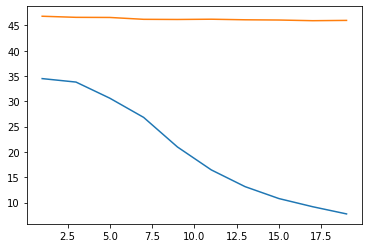

In [72]:
plt.plot(depths, train_losses)
plt.plot(depths, val_losses)

### SVM

In [73]:
train_losses = []
val_losses = []
depths = []

for degree in range(1, 20):
    depths.append(depth)
    model = svm.SVR(kernel="poly", C=100, gamma="auto", degree=degree, epsilon=0.1, coef0=1)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

NameError: name 'svm' is not defined

### K Nearest

## One label

In [8]:
features = df.iloc[:, 3: 20]
feature_names = df.columns[3: 20]
labels = df['score']
features = (features - features.mean()) / features.std()
labels = (labels - labels.mean()) / labels.std()

In [9]:
feature_names

Index(['reading_time', 'flesch_reading_score', 'dale_chall_readability_score',
       'total_paragraphs', 'avg_sentences_per_para',
       'len_of_longest_paragraph', 'total_sentences', 'avg_words_per_sentence',
       'len_of_longest_sentence', 'total_words', 'compulsive_hedgers',
       'intensifiers', 'and_frequency', 'vague_words_count',
       'vague_words_frequency', 'polysyllab_count', 'polysyllab_frequency'],
      dtype='object')

In [10]:
labels

37127    -0.150819
145595   -0.036974
21819     0.020230
75150    -0.171569
13190    -0.047068
            ...   
793      -0.146333
109500   -0.143529
60556    -0.179982
161173    0.101503
168604    0.054776
Name: score, Length: 189848, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=120)

In [12]:
X_train.shape

(151878, 17)

In [13]:
y_train.shape

(151878,)

In [14]:
X_test.shape

(37970, 17)

In [15]:
y_test.shape

(37970,)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=500)

In [17]:
X_train.shape

(121502, 17)

In [18]:
y_train.shape

(121502,)

In [19]:
X_val.shape

(30376, 17)

In [20]:
y_val.shape

(30376,)

### Random Forest Regressor

In [ ]:
train_losses = []
val_losses = []
depths = []

for depth in range(1, 20, 2):
    depths.append(depth)
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_pred =  model.predict(X_train)
    train_loss = mean_squared_error(y_train, train_pred)
    train_losses.append(train_loss)
    val_pred = model.predict(X_val)
    val_loss = mean_squared_error(y_val, val_pred)
    val_losses.append(val_loss)
    print(depth, train_loss, val_loss)

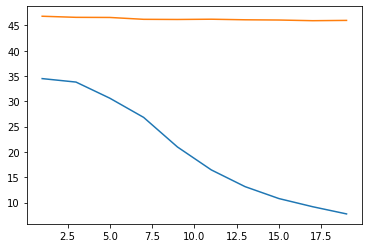

In [ ]:
plt.plot(depths, train_losses)
plt.plot(depths, val_losses)

### SVM

In [21]:
train_losses = []
val_losses = []

model = svm.SVR(kernel="poly", C=0.1, gamma="auto", degree=3)
model.fit(X_train, y_train)
train_pred =  model.predict(X_train)
train_loss = mean_squared_error(y_train, train_pred)
train_losses.append(train_loss)
val_pred = model.predict(X_val)
val_loss = mean_squared_error(y_val, val_pred)
val_losses.append(val_loss)
print(train_loss, val_loss)